In [1]:
!pip install squarify

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

In [13]:
data = pd.read_csv(r"C:\Users\NIHAL_MIRAJ\Downloads\Market_Basket_Optimisation.csv", header = None)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [15]:
data.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [16]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_encoded = data.notna().astype(int)

In [18]:
df_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7497,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7498,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7499,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
!pip install --upgrade mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [22]:
# Apply Apriori algorithm with a minimum support threshold
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

C:\Users\NIHAL_MIRAJ\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [24]:
# Generate association rules with a minimum lift threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5, num_itemsets=2)

In [25]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(2),(3),0.585122,0.445941,0.445941,0.762133,1.709045,1.0,0.185011,2.329279,1.000000,0.762133,0.570683,0.881066
1,(3),(2),0.445941,0.585122,0.445941,1.000000,1.709045,1.0,0.185011,inf,0.748797,0.762133,1.000000,0.881066
2,(2),(4),0.585122,0.337155,0.337155,0.576213,1.709045,1.0,0.139878,1.564100,1.000000,0.576213,0.360655,0.788107
3,(4),(2),0.337155,0.585122,0.337155,1.000000,1.709045,1.0,0.139878,inf,0.625905,0.576213,1.000000,0.788107
4,(2),(5),0.585122,0.248500,0.248500,0.424698,1.709045,1.0,0.103097,1.306270,1.000000,0.424698,0.234462,0.712349


In [26]:
# Sort the rules by lift to find the most interesting ones
rules_sorted = rules.sort_values(by='lift', ascending=False)

In [27]:
rules_sorted.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
54449,(9),"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.052660,0.087188,0.05266,1.000000,11.469419,1.0,0.048068,inf,0.963552,0.603976,1.000000,0.801988
45791,"(0, 8, 7)","(2, 4, 5, 6, 9)",0.087188,0.052660,0.05266,0.603976,11.469419,1.0,0.048068,2.392126,1.000000,0.603976,0.581962,0.801988
12012,"(0, 1, 2, 7, 8)",(9),0.087188,0.052660,0.05266,0.603976,11.469419,1.0,0.048068,2.392126,1.000000,0.603976,0.581962,0.801988
12013,"(0, 1, 2, 7, 9)",(8),0.052660,0.087188,0.05266,1.000000,11.469419,1.0,0.048068,inf,0.963552,0.603976,1.000000,0.801988
32088,"(0, 8, 3, 5)","(9, 4, 6)",0.087188,0.052660,0.05266,0.603976,11.469419,1.0,0.048068,2.392126,1.000000,0.603976,0.581962,0.801988
49847,"(8, 4, 5)","(0, 1, 2, 3, 6, 9)",0.087188,0.052660,0.05266,0.603976,11.469419,1.0,0.048068,2.392126,1.000000,0.603976,0.581962,0.801988
32086,"(0, 9, 3, 4)","(8, 5, 6)",0.052660,0.087188,0.05266,1.000000,11.469419,1.0,0.048068,inf,0.963552,0.603976,1.000000,0.801988
12017,"(0, 1, 2, 8)","(9, 7)",0.087188,0.052660,0.05266,0.603976,11.469419,1.0,0.048068,2.392126,1.000000,0.603976,0.581962,0.801988
12018,"(0, 1, 2, 9)","(8, 7)",0.052660,0.087188,0.05266,1.000000,11.469419,1.0,0.048068,inf,0.963552,0.603976,1.000000,0.801988
12019,"(0, 1, 8, 7)","(9, 2)",0.087188,0.052660,0.05266,0.603976,11.469419,1.0,0.048068,2.392126,1.000000,0.603976,0.581962,0.801988


In [29]:
# Filter rules based on high confidence
high_confidence_rules = rules_sorted[rules_sorted['confidence'] > 0.7]
high_confidence_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
54449,(9),"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.052660,0.087188,0.052660,1.000000,11.469419,1.0,0.048068,inf,0.963552,0.603976,1.000000,0.801988
12013,"(0, 1, 2, 7, 9)",(8),0.052660,0.087188,0.052660,1.000000,11.469419,1.0,0.048068,inf,0.963552,0.603976,1.000000,0.801988
32086,"(0, 9, 3, 4)","(8, 5, 6)",0.052660,0.087188,0.052660,1.000000,11.469419,1.0,0.048068,inf,0.963552,0.603976,1.000000,0.801988
12018,"(0, 1, 2, 9)","(8, 7)",0.052660,0.087188,0.052660,1.000000,11.469419,1.0,0.048068,inf,0.963552,0.603976,1.000000,0.801988
12020,"(0, 1, 9, 7)","(8, 2)",0.052660,0.087188,0.052660,1.000000,11.469419,1.0,0.048068,inf,0.963552,0.603976,1.000000,0.801988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,"(0, 2)","(1, 3)",0.585122,0.445941,0.445941,0.762133,1.709045,1.0,0.185011,2.329279,1.000000,0.762133,0.570683,0.881066
616,"(0, 1, 2)",(3),0.585122,0.445941,0.445941,0.762133,1.709045,1.0,0.185011,2.329279,1.000000,0.762133,0.570683,0.881066
168,"(1, 2)",(3),0.585122,0.445941,0.445941,0.762133,1.709045,1.0,0.185011,2.329279,1.000000,0.762133,0.570683,0.881066
170,(2),"(1, 3)",0.585122,0.445941,0.445941,0.762133,1.709045,1.0,0.185011,2.329279,1.000000,0.762133,0.570683,0.881066


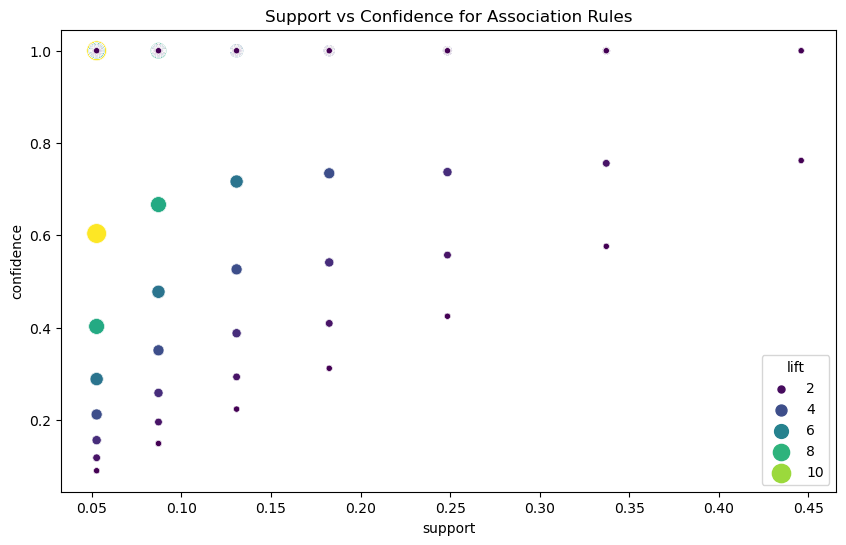

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot support vs confidence for association rules
plt.figure(figsize=(10,6))
sns.scatterplot(data=rules_sorted, x='support', y='confidence', hue='lift', palette='viridis', size='lift', sizes=(20, 200))
plt.title('Support vs Confidence for Association Rules')
plt.show()

2. What is support and confidence? How do you calculate them?
Support and Confidence are two important metrics in Association Rule Mining used to evaluate the relevance and reliability of the rules.

Support: This measures the frequency or proportion of transactions in which a certain itemset occurs. It shows how frequently the items in the rule appear in the dataset.Support helps in identifying how commonly a rule applies in the dataset.

Confidence: This measures the reliability of the rule, i.e., how often item ~𝐵 appears in transactions where ~𝐴 appears. It is the conditional probability of finding ~𝐵 given that ~𝐴 is present.